# Import library

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , ConfusionMatrixDisplay
import pickle
import warnings

from sklearn import metrics
warnings.filterwarnings('ignore')

# import dataset

In [355]:
df = pd.read_csv('WineQT.csv')

# Pisahkan fitur dan target

In [356]:

X = df.drop(columns=['quality', 'Id']) # hapus kolom id dan quality karena bukan target atau variabel X
y = df['quality']

print("fitur X = ", X)
print("target y =", y)

fitur X =        fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfu

#  Split data atau pisahkan data

In [357]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("data siap dilatih")

data siap dilatih


# Latih model id3 dengan kriteria ENTROPY

In [358]:

# menggunakan gain = entropy untuk membuat kriteria = entropy

id3_model = tree.DecisionTreeClassifier()
id3_model.fit(X_train, y_train)





,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Prediksi


In [359]:
y_pred = id3_model.predict(X_test)
print("prediksi = ", y_pred)

prediksi =  [6 5 5 5 5 5 6 6 7 5 5 5 5 5 6 5 5 6 6 5 7 5 6 5 5 6 6 5 6 6 7 5 5 7 6 5 6
 7 6 6 5 5 6 5 6 4 7 6 6 4 5 7 6 6 5 5 5 7 6 6 6 4 5 5 6 6 6 5 6 5 5 5 7 6
 5 5 5 6 5 6 5 6 5 7 5 6 6 5 5 5 5 5 5 6 6 5 6 6 5 6 5 5 7 5 7 6 5 5 5 5 5
 5 6 6 5 6 5 6 5 5 7 7 7 5 5 5 5 7 4 7 6 5 5 7 8 5 6 6 6 5 7 5 6 5 5 6 6 5
 5 7 5 5 6 7 7 8 5 6 5 7 7 6 5 7 5 6 7 6 5 7 6 4 7 5 5 7 5 5 6 5 6 6 6 6 5
 5 5 6 5 6 6 5 6 5 7 5 5 5 6 5 6 5 6 6 6 7 5 5 5 5 6 5 7 4 6 5 6 6 5 5 5 7
 6 6 5 6 5 6 7]


# Akurasi


akurasi=  0.6157205240174672
akurasi=  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001CD196B9F50>


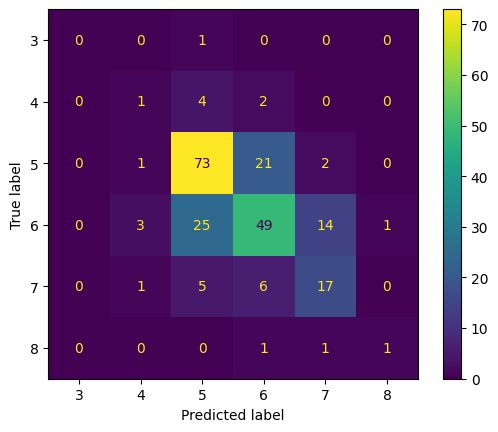

In [360]:

print("akurasi= ", metrics.accuracy_score(y_test, y_pred))

akurasi_score = accuracy_score(y_test, y_pred)
akurasi = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

print("akurasi= ",akurasi)



# Evaluasi model

In [361]:
print("hasil klasifikasi")
print(classification_report(y_test, y_pred))

hasil klasifikasi
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.14      0.15         7
           5       0.68      0.75      0.71        97
           6       0.62      0.53      0.57        92
           7       0.50      0.59      0.54        29
           8       0.50      0.33      0.40         3

    accuracy                           0.62       229
   macro avg       0.41      0.39      0.40       229
weighted avg       0.61      0.62      0.61       229



In [362]:
# Tambahkan ini di akhir notebook setelah plot_tree

import os
public_dir = '../public'
if not os.path.exists(public_dir):
    os.makedirs(public_dir)

# Simpan gambar ke folder public
plt.figure(figsize=(25, 15))
plot_tree(
    id3_model,
    feature_names=X.columns,
    class_names=[str(c) for c in id3_model.classes_],
    filled=True, 
    rounded=True,
    fontsize=10
)
plt.title("Visualisasi Pohon Keputusan (ID3-style)", fontsize=16)
plt.savefig(os.path.join(public_dir, 'id3_tree.png'), bbox_inches='tight', dpi=100)
plt.close()

print(f"gambar disimpan di = {os.path.abspath(os.path.join(public_dir, 'id3_tree.png'))}")

gambar disimpan di = c:\Users\fatwa\OneDrive\Documents\tugas_NB_wine\public\id3_tree.png


# Confusion Matrix

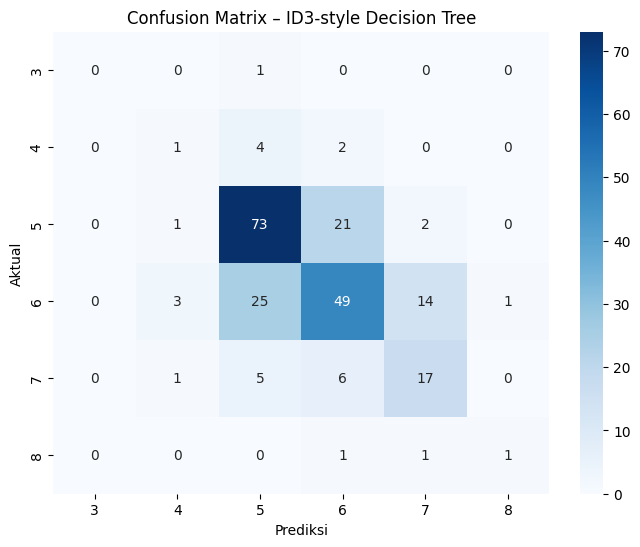

In [363]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix – ID3-style Decision Tree')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# 8. Prediksi data baru (dari id 3 dataset)

In [364]:
data_baru = np.array([[7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]])

pred = id3_model.predict(data_baru)
pred_proba = id3_model.predict_proba(data_baru)

print(f"data dari id 3 =  Prediksi kualitas = {pred[0]}")
print("peluang per kelas =")
for kelas, prob in zip(id3_model.classes_, pred_proba[0]):
    print(f"  kualitas = {kelas} || peluang = {prob}")

data dari id 3 =  Prediksi kualitas = 5
peluang per kelas =
  kualitas = 3 || peluang = 0.0
  kualitas = 4 || peluang = 0.0
  kualitas = 5 || peluang = 1.0
  kualitas = 6 || peluang = 0.0
  kualitas = 7 || peluang = 0.0
  kualitas = 8 || peluang = 0.0


# simpan model

In [365]:
with open('id3_data_wine.pkl', 'wb') as f:
    pickle.dump(id3_model, f)


# Simpan akurasi ID3
with open('id3_accuracy.pkl', 'wb') as f:
    pickle.dump(float(akurasi_score), f)
print("Akurasi berhasil disimpan ke file .pkl")
print("model berhasil disimpan")

Akurasi berhasil disimpan ke file .pkl
model berhasil disimpan


#### tampilan tree

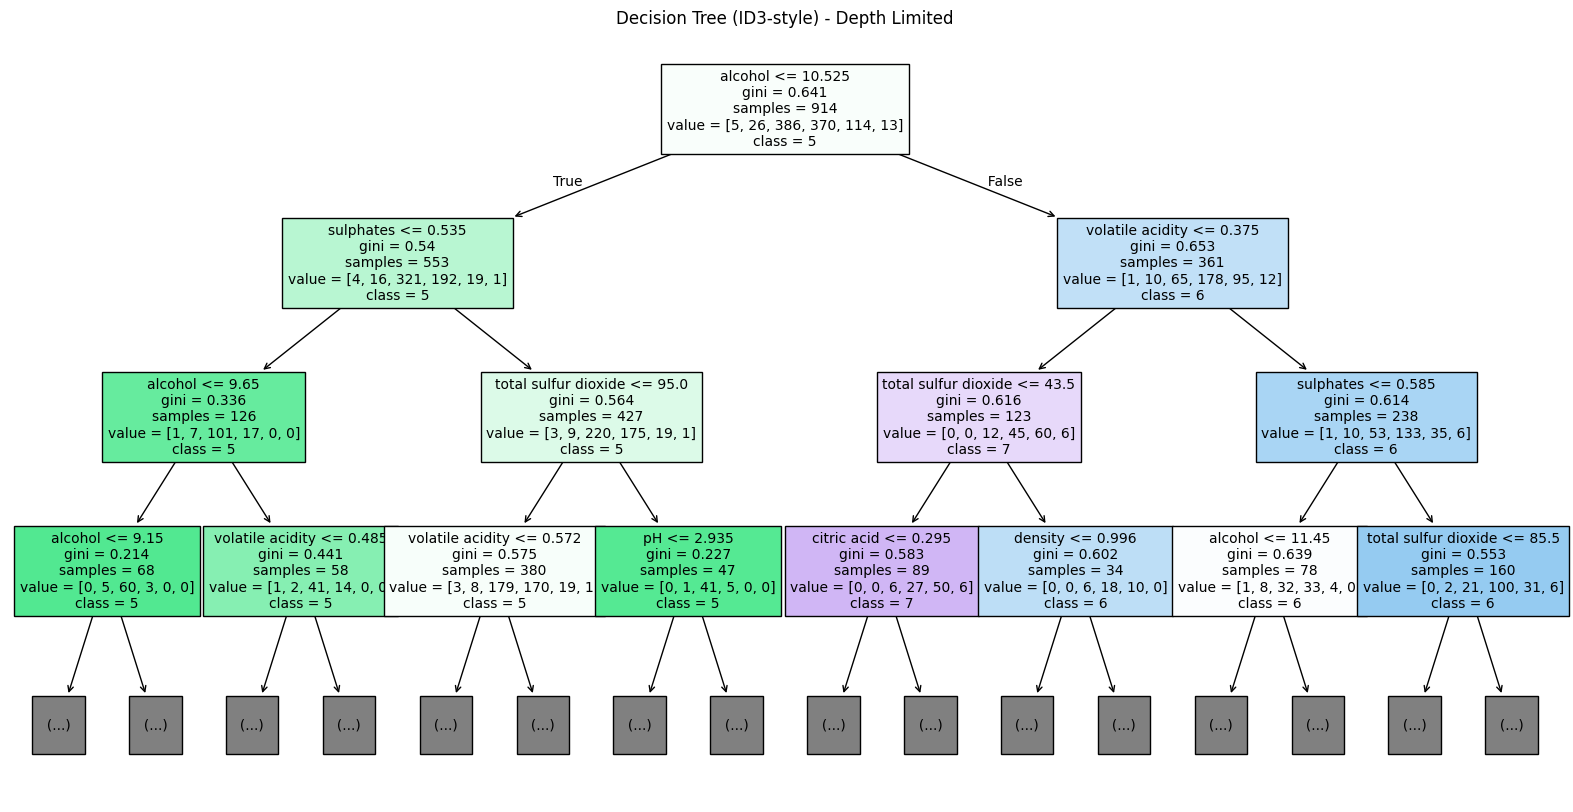

In [366]:
plt.figure(figsize=(20, 10))
plot_tree(
    id3_model,
    max_depth=3,  # hanya tampilkan depth 0, 1, 2 (3 level)
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    fontsize=10
)
plt.title("Decision Tree (ID3-style) - Depth Limited")
plt.show()